In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/Working Space/Data_coffee/Data_coffee_complete_correlationWithGroup.csv')
Data = Data.drop(columns=['field1'])
Data


In [5]:
feature = Data.iloc[:,5:].columns
feature

Index(['L', 'A', 'B', 'Total_phenol', 'Total_Flavonoid', 'Antioxidant',
       'caffeic_acid', 'Theobromine', 'K', 'Fe', 'Zn', 'Na', 'sucrose_maltose',
       'fluctose_arabinise', 'Lactic_acid', 'Malic_acid', 'Propionic_acid',
       'Quinic_acid', 'Apartic_acid', 'Serine', 'alanine', 'glycine',
       'threonine', 'glutamic_acid', 'proline', 'histidine', 'arginine',
       'leucine', 'phynylalanine'],
      dtype='object')

In [6]:
feature_corr = Data[feature].corr()
feature_uncorr = feature_corr.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) <= 0.05 else 'background-color: white')
feature_uncorr

,L,A,B,Total_phenol,Total_Flavonoid,Antioxidant,caffeic_acid,Theobromine,K,Fe,Zn,Na,sucrose_maltose,fluctose_arabinise,Lactic_acid,Malic_acid,Propionic_acid,Quinic_acid,Apartic_acid,Serine,alanine,glycine,threonine,glutamic_acid,proline,histidine,arginine,leucine,phynylalanine
L,1.000000,0.736782,0.855970,0.034785,-0.088611,0.727403,0.494378,-0.659167,0.281987,-0.826799,-0.070507,-0.112891,-0.785085,-0.724650,0.573523,-0.291168,-0.354291,-0.133389,0.075767,-0.023217,0.151388,0.707191,0.111233,-0.751899,0.071911,0.351450,0.144081,0.127863,0.151947
A,0.736782,1.000000,0.548732,0.217425,-0.035986,0.566567,0.551825,-0.772327,0.355249,-0.677421,-0.230599,-0.384136,-0.726978,-0.620067,0.524475,-0.295556,-0.189547,-0.335066,0.374259,0.309156,0.472500,0.837245,0.426016,-0.520495,0.449758,0.518953,0.396495,0.533893,0.379992
B,0.855970,0.548732,1.000000,0.020169,-0.084454,0.470224,0.456570,-0.403792,0.367564,-0.666567,-0.051027,0.002367,-0.777991,-0.714439,0.393204,-0.218786,-0.440838,-0.224093,-0.023502,-0.225910,0.042923,0.603464,0.025251,-0.744277,0.054642,0.280394,0.048754,0.123144,-0.008063
Total_phenol,0.034785,0.217425,0.020169,1.000000,0.785574,0.026593,-0.115770,-0.424352,0.057392,0.189072,0.392398,0.460048,0.046179,0.199774,-0.356616,0.444477,0.441051,0.036784,-0.326864,-0.352627,-0.368477,0.082655,-0.300031,-0.082326,-0.104874,-0.125219,-0.614214,0.005474,-0.498566
Total_Flavonoid,-0.088611,-0.035986,-0.084454,0.785574,1.000000,-0.236087,-0.363182,-0.451829,-0.315149,0.311644,0.210569,0.604402,0.275609,0.260217,-0.591022,0.888909,0.767405,0.503749,-0.459605,-0.670414,-0.759034,-0.373381,-0.755548,0.277442,-0.631016,-0.529518,-0.838144,-0.544031,-0.835588
Antioxidant,0.727403,0.566567,0.470224,0.026593,-0.236087,1.000000,0.636962,-0.557886,0.126964,-0.388554,-0.085043,-0.476353,-0.330278,-0.236086,0.674514,-0.452910,-0.457620,-0.453434,-0.065513,0.241429,0.330417,0.612025,0.315209,-0.799542,0.254736,0.332657,0.276384,0.311569,0.305951
caffeic_acid,0.494378,0.551825,0.456570,-0.115770,-0.363182,0.636962,1.000000,-0.338660,-0.062289,-0.241304,-0.085968,-0.561795,-0.288818,-0.097755,0.458475,-0.409044,-0.358504,-0.525869,-0.223058,0.096325,0.365239,0.466169,0.341717,-0.783973,0.347958,0.058489,0.337311,0.487368,0.267253
Theobromine,-0.659167,-0.772327,-0.403792,-0.424352,-0.451829,-0.557886,-0.338660,1.000000,0.114325,0.382259,0.115973,0.102354,0.327461,0.299672,-0.299754,-0.251984,-0.270861,-0.094030,0.030766,0.093753,0.084647,-0.410014,0.146667,0.325519,0.133696,-0.028038,0.098236,0.008433,0.150089
K,0.281987,0.355249,0.367564,0.057392,-0.315149,0.126964,-0.062289,0.114325,1.000000,-0.470293,-0.332664,-0.219585,-0.692589,-0.670646,0.135208,-0.575339,-0.704865,-0.617733,0.591268,0.370950,0.610539,0.679707,0.627180,-0.291127,0.663277,0.859472,0.429482,0.531622,0.525078
Fe,-0.826799,-0.677421,-0.666567,0.189072,0.311644,-0.388554,-0.241304,0.382259,-0.470293,1.000000,0.115274,0.071791,0.919807,0.899786,-0.547491,0.461626,0.383761,0.029131,-0.486496,-0.242397,-0.373973,-0.727189,-0.331462,0.442571,-0.257896,-0.566643,-0.387689,-0.230421,-0.440881


In [7]:
X = Data[feature]
scaler = StandardScaler()
X_t = scaler.fit_transform(X)

In [8]:
dz = pd.DataFrame(X_t.round(4), columns=[f'z_{c}' for c in feature])
dz

,z_L,z_A,z_B,z_Total_phenol,z_Total_Flavonoid,z_Antioxidant,z_caffeic_acid,z_Theobromine,z_K,z_Fe,...,z_Serine,z_alanine,z_glycine,z_threonine,z_glutamic_acid,z_proline,z_histidine,z_arginine,z_leucine,z_phynylalanine
0,-1.1608,-0.9995,-1.1048,0.1377,0.5290,-0.4462,-0.3057,0.3621,-1.0104,1.4770,...,-0.4355,-0.6784,-1.2598,-0.6732,0.7255,-0.6539,-1.0707,-0.6204,-0.6182,-0.7349
1,-1.1608,-0.9995,-1.1048,0.1377,0.5290,-0.4462,-0.3057,0.3621,-1.0104,1.4770,...,-0.4355,-0.6784,-1.2598,-0.6732,0.7255,-0.6539,-1.0707,-0.6204,-0.6182,-0.7349
2,-1.1608,-0.9995,-1.1048,0.1377,0.5290,-0.4462,-0.3057,0.3621,-1.0104,1.4770,...,-0.4355,-0.6784,-1.2598,-0.6732,0.7255,-0.6539,-1.0707,-0.6204,-0.6182,-0.7349
3,-1.1608,-0.9995,-1.1048,0.1377,0.5290,-0.4462,-0.3057,0.3621,-1.0104,1.4770,...,-0.4355,-0.6784,-1.2598,-0.6732,0.7255,-0.6539,-1.0707,-0.6204,-0.6182,-0.7349
4,-1.1608,-0.9995,-1.1048,0.1377,0.5290,-0.4462,-0.3057,0.3621,-1.0104,1.4770,...,-0.4355,-0.6784,-1.2598,-0.6732,0.7255,-0.6539,-1.0707,-0.6204,-0.6182,-0.7349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,-0.0745,0.5864,-0.6671,-3.7583,-2.7673,-0.4316,0.9352,0.3621,-1.0486,-1.3334,...,2.2364,1.9438,0.0891,1.5404,1.1187,0.7726,0.4434,3.0854,0.6153,2.4956
65,-0.0745,0.5864,-0.6671,-3.7583,-2.7673,-0.4316,0.9352,0.3621,-1.0486,-1.3334,...,2.2364,1.9438,0.0891,1.5404,1.1187,0.7726,0.4434,3.0854,0.6153,2.4956
66,0.6124,-0.2859,-0.0965,-1.2331,-1.5580,1.7751,-1.5466,0.3621,1.9999,-0.7147,...,2.3137,1.6783,1.2024,1.6658,-0.0638,1.0859,2.7234,1.7824,0.3248,2.0492
67,0.6124,-0.2859,-0.0965,-1.2331,-1.5580,1.7751,-1.5466,0.3621,1.9999,-0.7147,...,2.3137,1.6783,1.2024,1.6658,-0.0638,1.0859,2.7234,1.7824,0.3248,2.0492


In [9]:
pca = PCA(n_components=X_t.shape[1])

pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}') # Eigenvalues
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=29) = [1.44339020e+01 5.49181513e+00 2.86485679e+00 2.14090471e+00
 1.89445071e+00 1.62914955e+00 6.84294725e-01 2.87097001e-01
 8.99758282e-32 8.99758282e-32 8.99758282e-32 8.99758282e-32
 8.99758282e-32 8.99758282e-32 8.99758282e-32 8.99758282e-32
 8.99758282e-32 8.99758282e-32 8.99758282e-32 8.99758282e-32
 8.99758282e-32 8.99758282e-32 8.99758282e-32 8.99758282e-32
 8.99758282e-32 8.99758282e-32 8.99758282e-32 8.99758282e-32
 1.15992986e-32]
explained_variance_ratio (n_components=29) = [4.90507413e-01 1.86628400e-01 9.73564526e-02 7.27543831e-02
 6.43791347e-02 5.53634028e-02 2.32543935e-02 9.75641982e-03
 3.05764933e-33 3.05764933e-33 3.05764933e-33 3.05764933e-33
 3.05764933e-33 3.05764933e-33 3.05764933e-33 3.05764933e-33
 3.05764933e-33 3.05764933e-33 3.05764933e-33 3.05764933e-33
 3.05764933e-33 3.05764933e-33 3.05764933e-33 3.05764933e-33
 3.05764933e-33 3.05764933e-33 3.05764933e-33 3.05764933e-33
 3.94179064e-34]
sum explained_variance_ratio

In [10]:
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(10, 7)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t=scaler.fit_transform(X)

    max_components = min(X.shape)
    x=np.arange(1, n_components+1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1=pca.explained_variance_ratio_[:n_components]
    y2=np.cumsum(pca.explained_variance_ratio_)[:n_components]
    
    plt.figure(figsize=figsize)
    
    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker=marker, label='cumulative', color='salmon')
        
    plt.plot(x, y1, linestyle='-', marker=marker, label='individual', color='deepskyblue')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']), 
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
                plt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize=10)
                if with_cumulative:
                    plt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize=10)

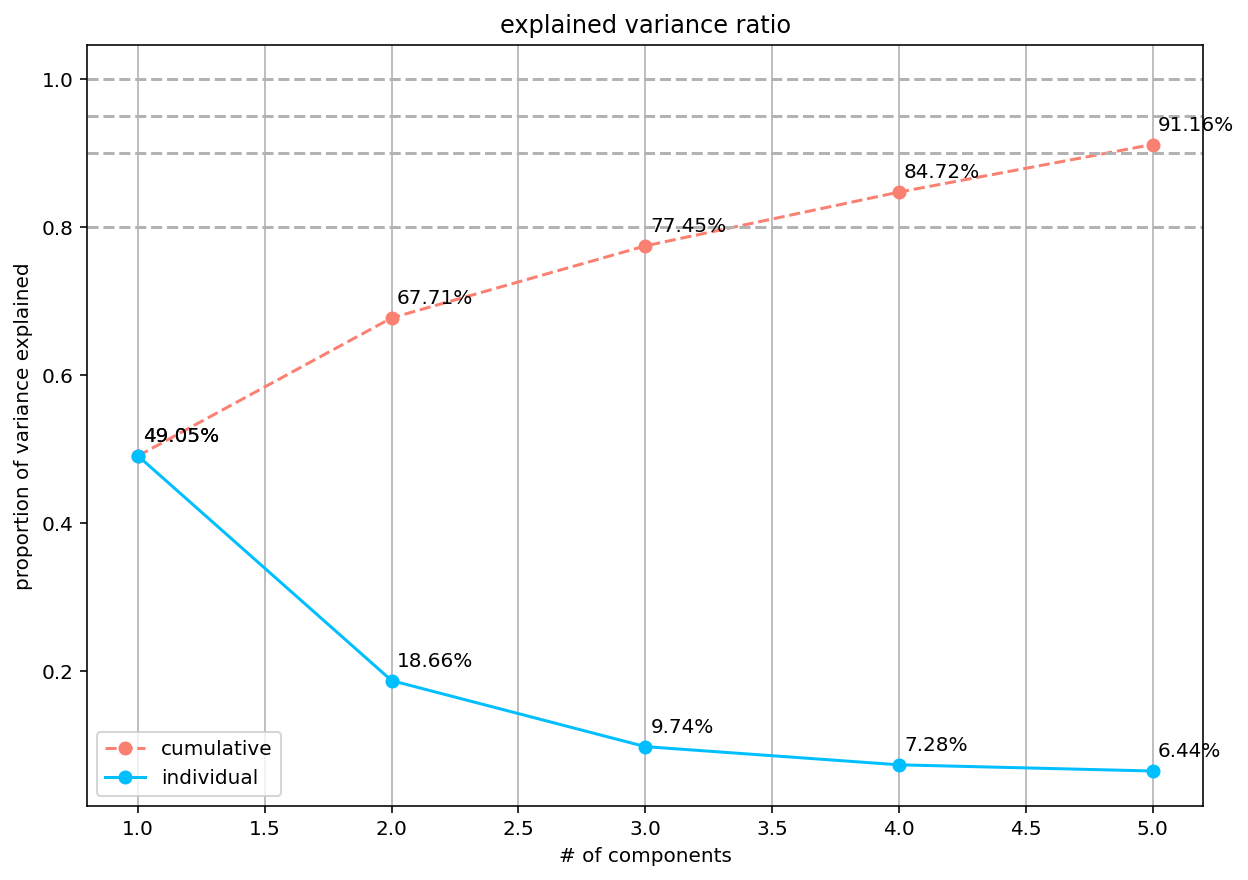

In [11]:
scree_plot(X, 5, True, True)

In [12]:
dpc=pd.DataFrame(pca.components_.T, 
                  index=Data[feature].columns,
                  columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
dpc


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29
L,0.1286,0.3610,0.0071,0.1336,0.0537,0.0501,0.1155,0.1041,0.0000,0.0000,...,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.8976
A,0.1679,0.2498,0.0206,-0.2089,0.2471,-0.1079,-0.2265,0.0539,-0.0667,-0.0590,...,0.2574,-0.1014,-0.1929,0.0741,0.2393,0.1254,0.0047,-0.1927,0.1327,0.0795
B,0.1042,0.3380,0.0216,0.1744,-0.1990,-0.0029,-0.1164,-0.5267,0.1700,0.2351,...,-0.1447,-0.1549,0.2558,0.0318,0.1018,0.0286,-0.0529,-0.3627,-0.1698,0.0889
Total_phenol,-0.0860,0.1813,0.0003,-0.5661,-0.1280,-0.0063,0.1010,0.1026,-0.0593,0.1020,...,0.1365,0.2609,0.0912,0.2825,0.0620,-0.2649,-0.0353,-0.1461,0.1458,-0.0068
Total_Flavonoid,-0.1938,0.1814,0.0934,-0.3156,0.0551,-0.1576,0.0967,-0.0591,-0.1086,-0.1574,...,-0.1584,0.0434,0.0300,0.0076,0.2036,0.2464,0.2444,-0.3164,-0.0330,-0.0010
Antioxidant,0.1408,0.2105,-0.3021,0.0182,0.1119,0.0198,0.5234,0.1961,-0.1230,0.2248,...,0.0831,-0.2544,0.1209,-0.1105,0.0761,-0.0070,-0.1023,0.1763,0.1624,0.2031
caffeic_acid,0.1255,0.1479,-0.4226,0.0560,0.0508,-0.0468,-0.4504,0.0781,-0.0777,-0.0991,...,-0.0533,-0.0177,0.0275,-0.0272,-0.0153,-0.1584,0.1060,-0.0714,0.1428,0.0340
Theobromine,-0.0251,-0.3232,0.0355,0.1891,-0.4023,0.1502,-0.1103,0.0309,-0.1392,0.0958,...,0.2730,-0.0084,-0.0523,-0.1443,0.3410,0.1349,0.2361,-0.1252,0.2469,-0.1314
K,0.1802,0.0109,0.2569,-0.1381,-0.3679,-0.1576,0.1592,0.0627,0.1757,-0.2355,...,0.3100,0.0590,0.4013,-0.0350,-0.0955,0.0689,-0.0164,0.1270,-0.0761,0.0087
Fe,-0.1634,-0.2322,-0.2479,-0.1686,-0.0750,-0.1428,0.1139,-0.3898,-0.1789,0.4577,...,0.0991,0.1679,0.0315,0.1388,-0.2736,0.0591,-0.0102,0.0289,0.0937,-0.1869


In [ ]:
import yellowbrick.features as yb
visualizer = yb.PCA(scale=True, proj_features=True, proj_dim=2)
visualizer.fit_transform(X)
visualizer.show()

In [ ]:
pca1 = PCA(n_components= 2)
components = pca1.fit_transform(X_t)
fig = px.scatter(components, x = 0, y = 1, color = Data['Groupping'])
fig.show()

In [13]:
pca = PCA(n_components=29)

X_pca=pca.fit_transform(X_t)

X_pca

array([[-3.96841832e+00, -1.71433184e+00, -1.21284488e+00, ...,
         6.04998714e-32, -3.72043149e-32,  5.78621317e-16],
       [-3.96841832e+00, -1.71433184e+00, -1.21284488e+00, ...,
         1.03393190e-32,  3.62029047e-32, -1.04324183e-16],
       [-3.96841832e+00, -1.71433184e+00, -1.21284488e+00, ...,
         7.99044847e-32,  5.76319336e-31,  2.88470589e-16],
       ...,
       [ 6.95966533e+00, -2.17229272e+00,  1.53957266e+00, ...,
         5.79946327e-31,  1.25094387e-30,  7.71926735e-17],
       [ 6.95966533e+00, -2.17229272e+00,  1.53957266e+00, ...,
        -2.91991281e-30, -1.53700884e-30,  6.47647863e-17],
       [ 6.95966533e+00, -2.17229272e+00,  1.53957266e+00, ...,
         2.24096216e-30,  2.43715613e-31,  7.52727691e-17]])

In [14]:
dd=pd.concat([pd.DataFrame(pca.transform(X_t), 
                           columns=[f'PC{n}' for n in range(1, pca.n_components_ + 1)]), 
              Data[['Groupping']]], axis = 'columns')

dd

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,Groupping
0,-3.968418,-1.714332,-1.212845,-0.221055,0.272538,-0.491640,0.192945,-0.053625,-4.227271e-16,3.919181e-16,...,-1.906872e-16,2.418334e-16,-1.249339e-16,-1.095108e-17,2.671962e-16,7.078018e-17,-4.077338e-16,-1.693941e-16,-1.098524e-15,1
1,-3.968418,-1.714332,-1.212845,-0.221055,0.272538,-0.491640,0.192945,-0.053625,-4.227271e-16,3.919181e-16,...,-1.906872e-16,2.418334e-16,-1.249339e-16,-1.095108e-17,2.671962e-16,7.078018e-17,-4.077338e-16,-1.693941e-16,-1.098524e-15,1
2,-3.968418,-1.714332,-1.212845,-0.221055,0.272538,-0.491640,0.192945,-0.053625,-4.227271e-16,3.919181e-16,...,-1.906872e-16,2.418334e-16,-1.249339e-16,-1.095108e-17,2.671962e-16,7.078018e-17,-4.077338e-16,-1.693941e-16,-1.098524e-15,1
3,-3.968418,-1.714332,-1.212845,-0.221055,0.272538,-0.491640,0.192945,-0.053625,-4.227271e-16,3.919181e-16,...,-1.906872e-16,2.418334e-16,-1.249339e-16,-1.095108e-17,2.671962e-16,7.078018e-17,-4.077338e-16,-1.693941e-16,-1.098524e-15,1
4,-3.968418,-1.714332,-1.212845,-0.221055,0.272538,-0.491640,0.192945,-0.053625,-4.227271e-16,3.919181e-16,...,-1.906872e-16,2.418334e-16,-1.249339e-16,-1.095108e-17,2.671962e-16,7.078018e-17,-4.077338e-16,-1.693941e-16,-1.098524e-15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,5.633780,-3.672699,0.649919,3.466794,3.902007,0.288262,-1.472480,0.048809,-3.900565e-16,-9.033993e-16,...,1.318337e-15,-1.160630e-15,-1.124330e-16,1.866256e-16,-5.435365e-17,1.402882e-17,6.243121e-16,3.063363e-16,8.175003e-16,6
65,5.633780,-3.672699,0.649919,3.466794,3.902007,0.288262,-1.472480,0.048809,-3.900565e-16,-9.033993e-16,...,1.318337e-15,-1.160630e-15,-1.124330e-16,1.866256e-16,-5.435365e-17,1.402882e-17,6.243121e-16,3.063363e-16,8.175003e-16,6
66,6.959665,-2.172293,1.539573,0.969164,0.051450,-0.073282,3.314448,-0.201550,7.248135e-17,-1.403112e-15,...,2.957261e-16,-4.934571e-16,-7.787300e-17,-4.184531e-16,-3.674478e-16,-1.007326e-16,9.517766e-16,4.203172e-16,5.017042e-16,6
67,6.959665,-2.172293,1.539573,0.969164,0.051450,-0.073282,3.314448,-0.201550,7.248135e-17,-1.403112e-15,...,2.957261e-16,-4.934571e-16,-7.787300e-17,-4.184531e-16,-3.674478e-16,-1.007326e-16,9.517766e-16,4.203172e-16,5.017042e-16,6


In [15]:
pca.n_components_

29

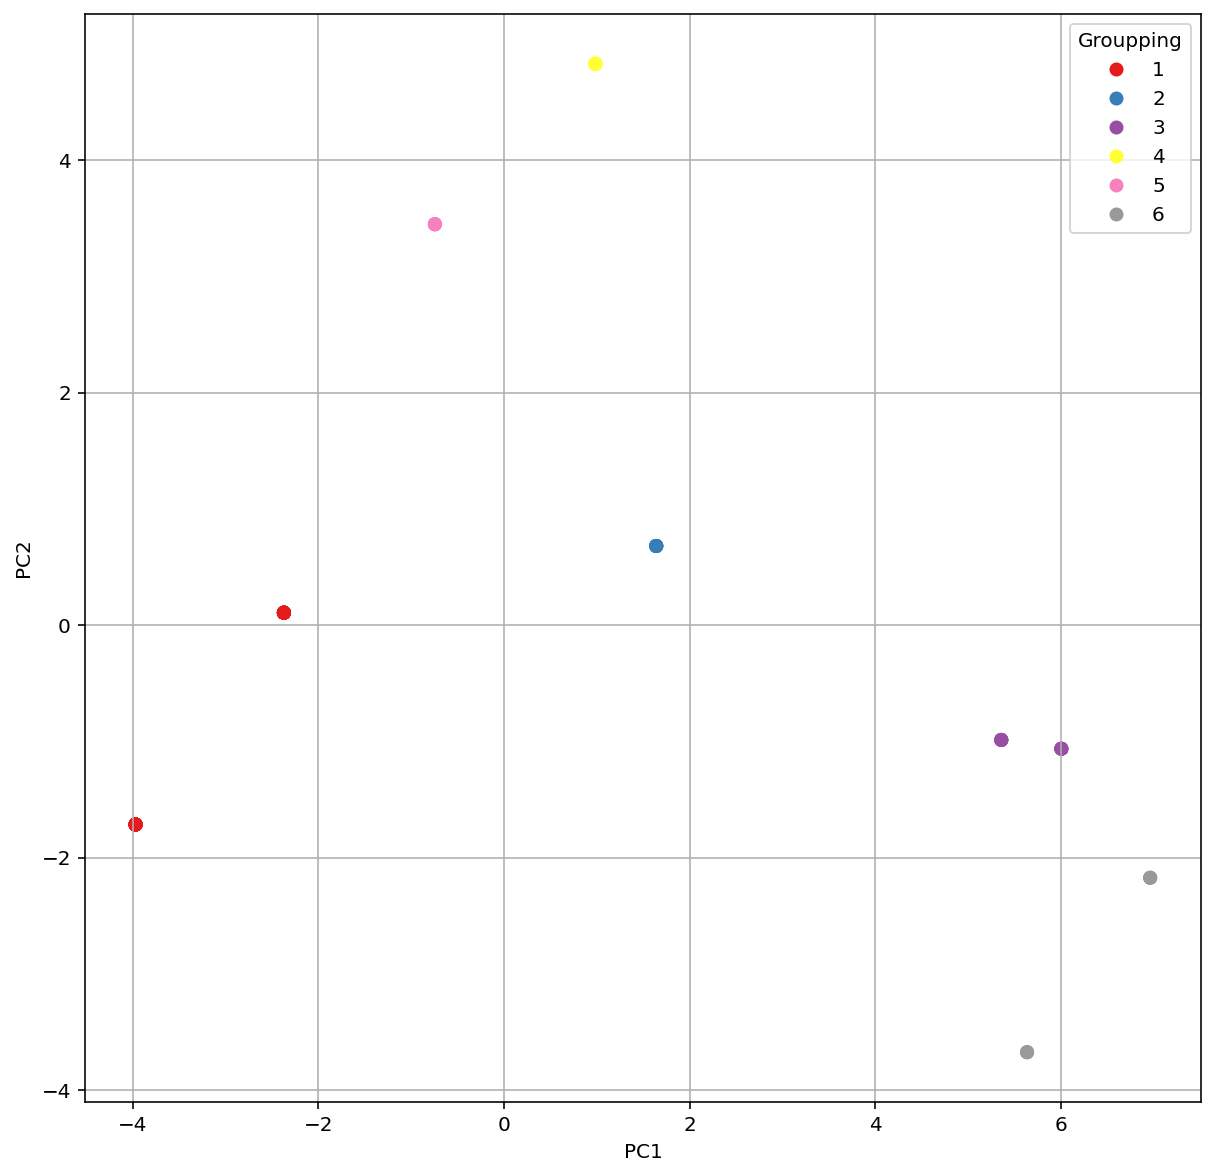

In [17]:
plt.figure(figsize=(10,10))
scatter = plt.scatter(dd['PC1'],dd['PC2'],cmap='Set1', c=Data.Groupping.astype('category').cat.codes)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(b=None)
plt.legend(handles=scatter.legend_elements()[0], 
           labels = ['1','2','3','4','5','6'],
           title = "Groupping")
plt.show()